<a href="https://colab.research.google.com/github/yarkalm/def_metallization/blob/main/Metallization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightGBM Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')


input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

In [3]:
input_data

,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750,15.0,0.4691,0.3981
1,80.0,20.0,0.0,0.0,100.0,750,30.0,0.4572,0.4126
2,80.0,20.0,0.0,0.0,100.0,750,60.0,0.4682,0.3997
3,80.0,20.0,0.0,0.0,100.0,750,90.0,0.4401,0.3679
4,80.0,20.0,0.0,0.0,100.0,750,120.0,0.4486,0.3715
...,...,...,...,...,...,...,...,...,...
657,76.5,23.0,0.5,0.0,100.0,750,90.0,0.4862,0.4074
658,76.5,23.0,0.5,0.0,100.0,750,120.0,0.4783,0.3926
659,76.5,23.0,0.5,0.0,100.0,750,15.0,0.4766,0.4383
660,76.5,23.0,0.5,0.0,100.0,750,30.0,0.4926,0.4208


In [4]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [6]:
y_train.iloc[0]

RedDegr    57.041699
Name: 17, dtype: float64

In [7]:
model = LGBMRegressor()
model.fit(x_train, np.ravel(y_train))

LGBMRegressor()

In [8]:
model.predict([x_train.iloc[0]])

array([57.07185607])

In [9]:
row = [80,
       20,
       0,
       0,
       100,
       750,
       30,
       0.45,
       0.41]
yhat = model.predict([row])
print('Prediction: %d' % yhat[0]) 

Prediction: 32


In [10]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict([x_train.iloc[i]]))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict([x_test.iloc[i]]))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i]-y_pred[i]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)


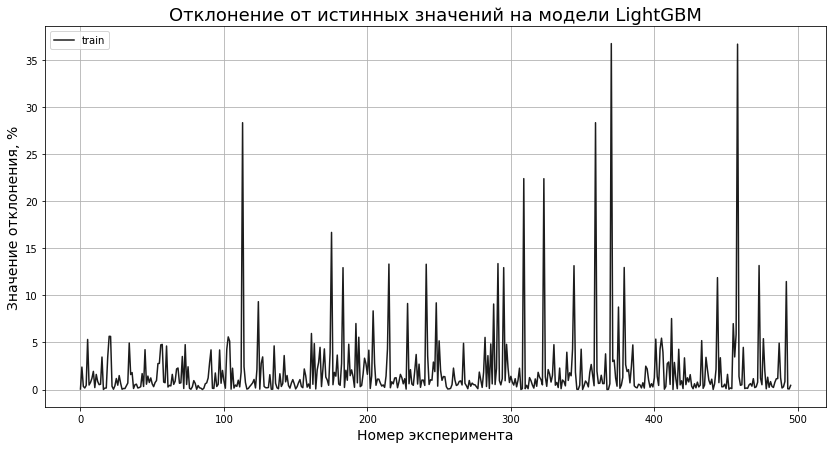

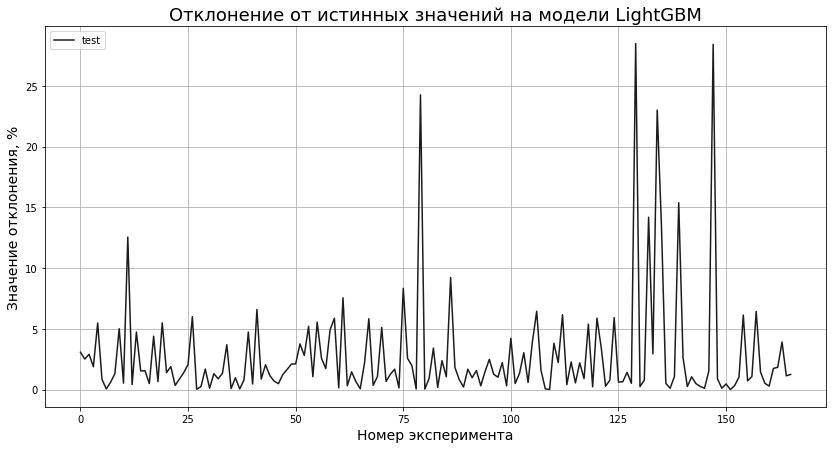

In [11]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели LightGBM', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train_LGBM.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели LightGBM', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test_LGBM.png")
plt.show()

# XGBoost

In [12]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')


input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

In [14]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [16]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
row = pd.DataFrame(columns = ['CO2', 'CO', 'H2', 'Herm', 'Magn', 'Temp', 'Time', 'm before', 'm after'])
row = row.append({'CO2':80,
       'CO':20,
       'H2':0,
       'Herm':0,
       'Magn':100,
       'Temp':750,
       'Time':30,
       'm before':0.45,
       'm after':0.41},ignore_index=True)

row

<ipython-input-17-4fbb9a954924>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append({'CO2':80,


,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750.0,30.0,0.45,0.41


In [18]:
yhat = model.predict(row)
print('Prediction: %d' % yhat[0]) 

Prediction: 36


In [19]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict(pd.DataFrame(x_train.iloc[i]).transpose()))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict(pd.DataFrame(x_test.iloc[i]).transpose()))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i]-y_pred[i]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)

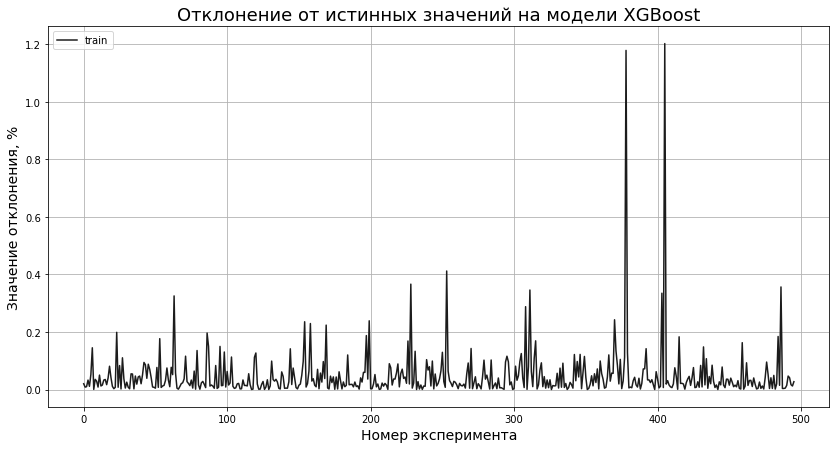

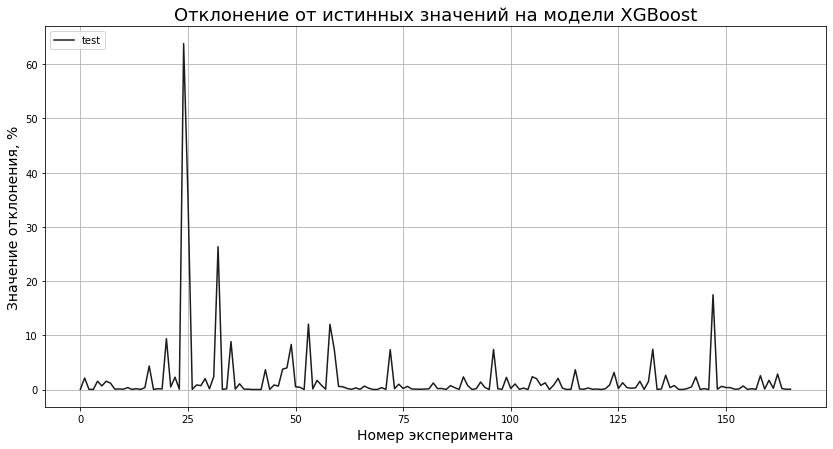

In [20]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели XGBoost', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train_XG.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели XGBoost', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test_XG.png")
plt.show()

# Sklearn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [22]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')


input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

In [23]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [25]:
df.head()

,ID,Number #,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after,PelDiam,SI,RedDegr
0,1,501.0,80.0,20.0,0.0,0.0,100.0,750,15.0,0.4691,0.3981,10.95,NaN,38.033641
1,2,502.0,80.0,20.0,0.0,0.0,100.0,750,30.0,0.4572,0.4126,10.95,NaN,38.023641
2,3,503.0,80.0,20.0,0.0,0.0,100.0,750,60.0,0.4682,0.3997,10.95,NaN,57.027486
3,4,504.0,80.0,20.0,0.0,0.0,100.0,750,90.0,0.4401,0.3679,10.95,NaN,63.945633
4,5,505.0,80.0,20.0,0.0,0.0,100.0,750,120.0,0.4486,0.3715,10.95,NaN,66.991572


In [26]:
df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after",'RedDegr']].corr().style.background_gradient(cmap='binary')

,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after,RedDegr
CO2,1.000000,-0.350635,-0.575959,-0.383469,0.383469,-0.408271,0.058379,-0.317927,0.078684,-0.217761
CO,-0.350635,1.000000,-0.054749,-0.268233,0.268233,0.170220,-0.081888,0.112962,0.131542,-0.054248
H2,-0.575959,-0.054749,1.000000,-0.069635,0.069635,0.231765,-0.105188,0.218814,-0.112954,0.291903
Herm,-0.383469,-0.268233,-0.069635,1.000000,-1.000000,0.140539,0.067447,0.072854,-0.194379,0.117863
Magn,0.383469,0.268233,0.069635,-1.000000,1.000000,-0.140539,-0.067447,-0.072854,0.194379,-0.117863
Temp,-0.408271,0.170220,0.231765,0.140539,-0.140539,1.000000,-0.047134,0.343081,-0.042475,0.273564
Time,0.058379,-0.081888,-0.105188,0.067447,-0.067447,-0.047134,1.000000,-0.053994,-0.391040,0.507987
m before,-0.317927,0.112962,0.218814,0.072854,-0.072854,0.343081,-0.053994,1.000000,0.629081,-0.179387
m after,0.078684,0.131542,-0.112954,-0.194379,0.194379,-0.042475,-0.391040,0.629081,1.000000,-0.849570
RedDegr,-0.217761,-0.054248,0.291903,0.117863,-0.117863,0.273564,0.507987,-0.179387,-0.849570,1.000000


In [27]:
model = RandomForestRegressor(n_estimators=80, max_features ='log2')

model.fit(x_train, y_train)

<ipython-input-27-12e1a187a04d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(max_features='log2', n_estimators=80)

In [28]:
row = pd.DataFrame(columns = ['CO2', 'CO', 'H2', 'Herm', 'Magn', 'Temp', 'Time', 'm before', 'm after'])
row = row.append({'CO2':80,
       'CO':20,
       'H2':0,
       'Herm':0,
       'Magn':100,
       'Temp':750,
       'Time':15,
       'm before':0.47,
       'm after':0.40},ignore_index=True)

row

<ipython-input-28-e2cc71bd9388>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append({'CO2':80,


,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750.0,15.0,0.47,0.4


In [29]:
yhat = model.predict(row)
print('Prediction: %d' % yhat[0]) 

Prediction: 37


In [30]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict(pd.DataFrame(x_train.iloc[i]).transpose()))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict(pd.DataFrame(x_test.iloc[i]).transpose()))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i][0]-y_pred[i][0]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
#test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)

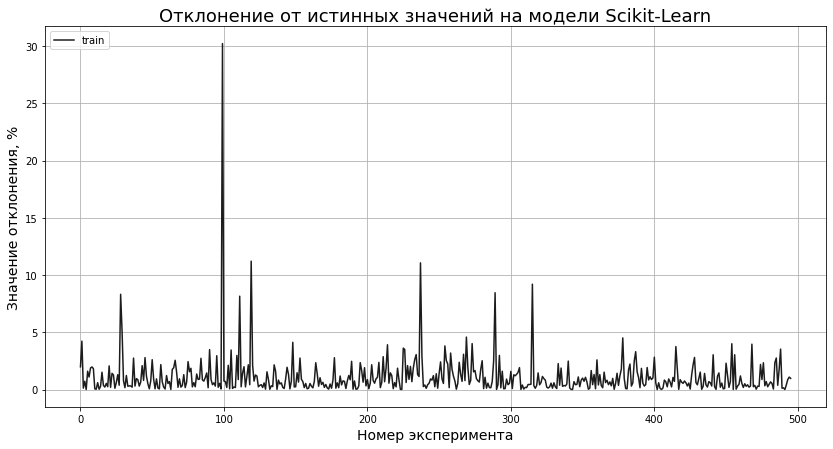

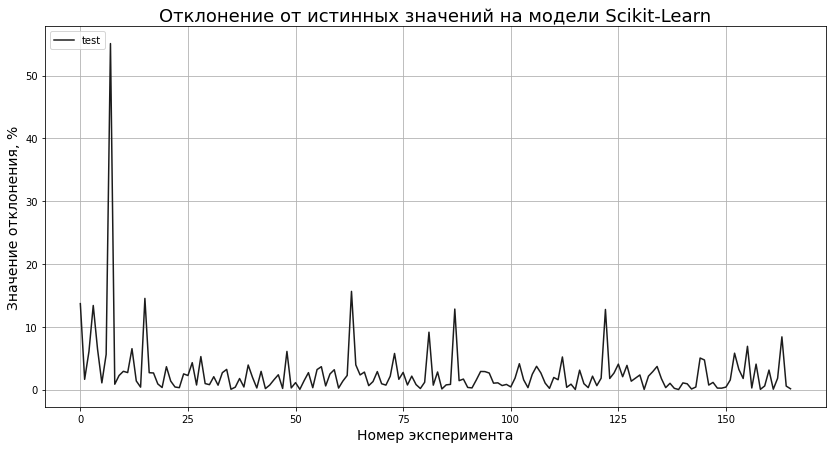

In [31]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели Scikit-Learn', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train_SKL.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели Scikit-Learn', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test_SKL.png")
plt.show()

# Sklearn DecisionTreeRegressor

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [33]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')


input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

In [34]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [35]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [36]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.370211 to fit


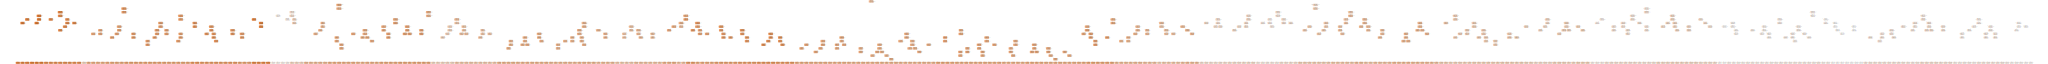

In [43]:
import graphviz 

dot_data = export_graphviz(model, out_file=None, 
                     feature_names=input_data.columns,  
                      filled=True, rounded=True,  
                      special_characters=True,
                      leaves_parallel = True,
                      node_ids= True)  
#graph.format = 'svg'
graph = graphviz.Source(dot_data)  
graph.render("DTR_graph", format = 'png') 
graph 

In [39]:
row = pd.DataFrame(columns = ['CO2', 'CO', 'H2', 'Herm', 'Magn', 'Temp', 'Time', 'm before', 'm after'])
row = row.append({'CO2':80,
       'CO':20,
       'H2':0,
       'Herm':0,
       'Magn':100,
       'Temp':750,
       'Time':15,
       'm before':0.47,
       'm after':0.40},ignore_index=True)

row

<ipython-input-39-e2cc71bd9388>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row = row.append({'CO2':80,


,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750.0,15.0,0.47,0.4


In [40]:
yhat = model.predict(row)
print('Prediction: %d' % yhat[0]) 

Prediction: 57


In [41]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict(pd.DataFrame(x_train.iloc[i]).transpose()))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict(pd.DataFrame(x_test.iloc[i]).transpose()))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i][0]-y_pred[i][0]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
#test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)

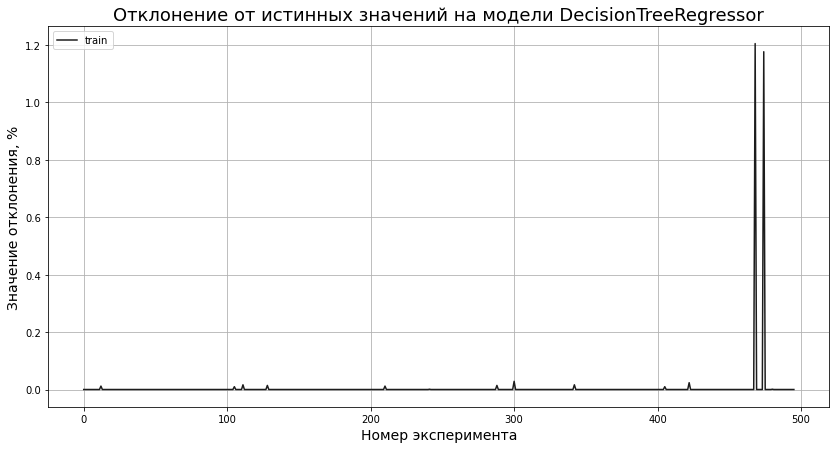

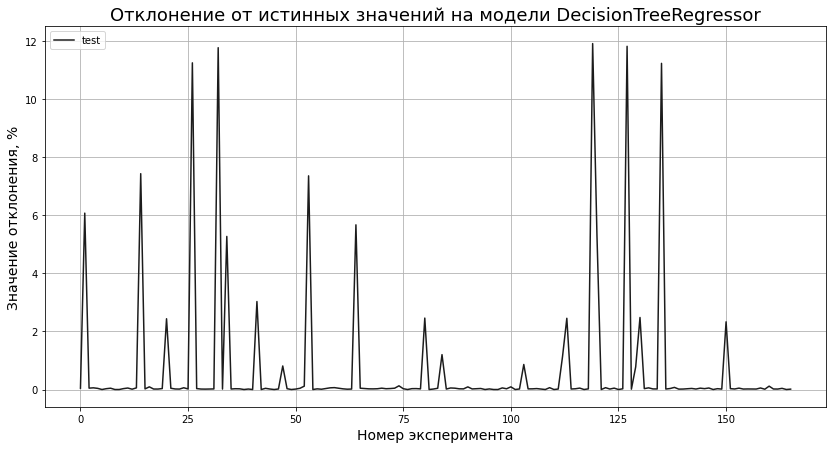

In [42]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели DecisionTreeRegressor', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train_DTR.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='#1C1C1C')
plt.title('Отклонение от истинных значений на модели DecisionTreeRegressor', fontsize=18)
plt.ylabel('Значение отклонения, %', fontsize=14)
plt.xlabel('Номер эксперимента', fontsize=14)
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test_DTR.png")
plt.show()